In [17]:
import numpy as np #general library, will come in handy later
import random #this library is for choosing random numbers
import matplotlib.pyplot as plt #this library is for graphing things
import statsmodels.api as sm #this is for linear regression

#note this extra library
import pandas as pd #another nice library for storing matrices, it rely's on numpy

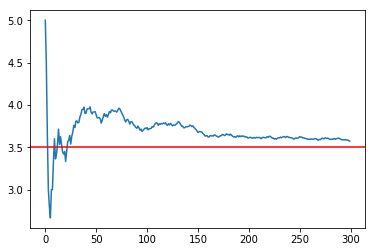

In [18]:
#homework question #2

dicerolls = [] #initialize rolls
means = []  #also calculate means

for i in range(300):
    dicerolls.append(random.randint(1,6)) #save rolls into  a list
    means.append( 1.0*sum(dicerolls)/len(dicerolls) ) #compute mean for each index

#graph dice rolls
plt.plot(means)
plt.axhline(3.5,color='r') #This is assymptotic expected value

In [19]:
#hw question #3 

#load data and set up variables
df = pd.read_csv('CARD.csv')
df['exper2'] = df['exper'] * df['exper']

In [20]:
#part a
model = sm.OLS(endog=df['lwage'],
               exog=df[['educ','exper','exper2','fatheduc','motheduc','black','smsa','south']],
               missing='drop')#run a regression of wage against educ without controls

results = model.fit()
print results.summary() 

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.076e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        11:16:11   Log-Likelihood:                -1996.5
No. Observations:                2220   AIC:                             4009.
Df Residuals:                    2212   BIC:                             4055.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.2568      0.005     56.450      0.0

In [21]:
#part c) ii)

stage1 = sm.OLS(endog=df['educ'],
               exog=df[['nearc4','exper','exper2','fatheduc','motheduc','black','smsa','south']],
               missing='drop')

stage1_results = stage1.fit()
print stage1_results.summary() 

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     6760.
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        11:16:11   Log-Likelihood:                -5395.4
No. Observations:                2220   AIC:                         1.081e+04
Df Residuals:                    2212   BIC:                         1.085e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
nearc4         0.9506      0.135      7.037      0.0

In [22]:
#part c) iii)

df['fitted_educ'] = stage1_results.fittedvalues

stage2 = sm.OLS(endog=df['lwage'],
               exog=df[['fitted_educ','exper','exper2','fatheduc','motheduc','black','smsa','south']],
               missing='drop')

stage2_results = stage2.fit()
print stage2_results.summary() #note, the standard errors are not correct

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.274e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        11:16:12   Log-Likelihood:                -2961.2
No. Observations:                2220   AIC:                             5938.
Df Residuals:                    2212   BIC:                             5984.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
fitted_educ     0.3417      0.047      7.198      